## Updated EDA: UCI Thyroid Dataset
Includes:

    -Updated data cleaning process with short explanations 
    -Model performance comparison for raw data 
    -Binary classification for target variable with model comparison, metric comparison and feature/permutation importance
    -Initial research questions based on results
    -Multi-class classification for target variable with model comparison and metric comparison

In [21]:
#Import Libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import jaccard_score, accuracy_score, hamming_loss
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.inspection import permutation_importance

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

## Load the dataset

In [3]:
#URL for UCI data
base_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/"

#Files to load
files = [
    'allbp.data', 'allhyper.data', 'allhypo.data', 'allrep.data', 
    'ann-train.data', 'ann-test.data', 'dis.data', 'sick.data', 
    'sick-euthyroid.data', 'thyroid0387.data'
]
column_names = [
    'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 
    'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 
    'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 
    'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 
    'referral_source', 'target', 'patient_id'
]

#Combine data from all files into one DataFrame
df = pd.DataFrame()

for file_name in files:
    file_url = base_url + file_name
    df = pd.read_csv(file_url, header=None, names=column_names, na_values='?')
    df = pd.concat([df, df], ignore_index=True)

## Add metadata

In [4]:
column_metadata = {
    'age': {
        'Role': 'Feature',
        'Type': 'Integer',
        'Description': 'Age of the patient',
        'Units': 'years',
    },
    'sex': {
        'Role': 'Feature',
        'Type': 'Categorical',
        'Description': 'Sex the patient identifies with',
        'Units': 'category',
    },
    'on_thyroxine': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is on thyroxine medication',
        'Units': 'binary',
    },
    'query_on_thyroxine': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has queried about thyroxine medication',
        'Units': 'binary',
    },
    'on_antithyroid_meds': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is on antithyroid medications',
        'Units': 'binary',
    },
    'sick': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is currently sick',
        'Units': 'binary',
    },
    'pregnant': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is pregnant',
        'Units': 'binary',
    },
    'thyroid_surgery': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has undergone thyroid surgery',
        'Units': 'binary',
    },
    'I131_treatment': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is undergoing I131 treatment',
        'Units': 'binary',
    },
    'query_hypothyroid': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient believes they have hypothyroid',
        'Units': 'binary',
    },
    'query_hyperthyroid': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient believes they have hyperthyroid',
        'Units': 'binary',
    },
    'lithium': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is taking lithium',
        'Units': 'binary',
    },
    'goitre': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has goitre',
        'Units': 'binary',
    },
    'tumor': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has a tumor',
        'Units': 'binary',
    },
    'hypopituitary': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has a hypopituitary condition',
        'Units': 'binary',
    },
    'psych': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has a psychiatric condition',
        'Units': 'binary',
    },
    'TSH_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether TSH level was measured',
        'Units': 'binary',
    },
    'TSH': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'TSH level in the blood',
        'Units': '',
    },
    'T3_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether T3 level was measured',
        'Units': 'binary',
    },
    'T3': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'T3 level in the blood',
        'Units': '',
    },
    'TT4_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether TT4 level was measured',
        'Units': 'binary',
    },
    'TT4': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'TT4 level in the blood',
        'Units': '',
    },
    'T4U_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether T4U level was measured',
        'Units': 'binary',
    },
    'T4U': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'T4U level in blood from lab work',
        'Units': '',
    },
    'FTI_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'whether FTI was measured in the blood',
        'Units': 'binary',
    },
    'FTI': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'FTI level in blood from lab work',
        'Units': '',
    },
    'TBG_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'whether TBG was measured in the blood',
        'Units': 'binary',
            },
    'TBG': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'TBG level in blood from lab work',
        'Units': '',
    },
    'referral_source': {
        'Role': 'Feature',
        'Type': 'String',
        'Description': '',
        'Units': '',
    },
    'target': {
        'Role': 'Target',
        'Type': 'Categorical',
        'Description': 'Diagnosed thyroid condition, encoded as letters',
        'Units': 'category',
        'Categories': {
            'A': 'hyperthyroid',
            'B': 'T3 toxic hyperthyroid',
            'C': 'toxic goitre hyperthyroid',
            'D': 'secondary toxic hyperthyroid',
            'E': 'hypothyroid',
            'F': 'primary hypothyroid',
            'G': 'compensated hypothyroid',
            'H': 'secondary hypothyroid',
            'I': 'increased binding protein',
            'J': 'decreased binding protein',
            'L': 'consistent with replacement therapy',
            'M': 'underreplaced',
            'N': 'overreplaced',
            'O': 'antithyroid drugs prescribed',
            'P': 'I131 treatment',
            'Q': 'surgery',
            'R': 'discordant assay results',
            'S': 'elevated TBG',
            'T': 'elevated thyroid hormones',  
        } 
    },
    'patient_id': {
        'Role': 'Feature',
        'Type': 'String',
        'Description': 'unique id of the patient',
        'Units': '',
    }
}

df.attrs['column_metadata'] = column_metadata 

## Description of raw data

In [5]:
print('Data Info')
display(df.info())

print('Data Head')
display(df.head())

print('Data Describe')
display(df.describe())

print("Data Types")
display(df.dtypes)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18344 entries, 0 to 18343
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  18344 non-null  int64  
 1   sex                  17730 non-null  object 
 2   on_thyroxine         18344 non-null  object 
 3   query_on_thyroxine   18344 non-null  object 
 4   on_antithyroid_meds  18344 non-null  object 
 5   sick                 18344 non-null  object 
 6   pregnant             18344 non-null  object 
 7   thyroid_surgery      18344 non-null  object 
 8   I131_treatment       18344 non-null  object 
 9   query_hypothyroid    18344 non-null  object 
 10  query_hyperthyroid   18344 non-null  object 
 11  lithium              18344 non-null  object 
 12  goitre               18344 non-null  object 
 13  tumor                18344 non-null  object 
 14  hypopituitary        18344 non-null  object 
 15  psych                18344

None

Data Head


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-[840801013],NaN
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-[840801014],NaN
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-[840801042],NaN
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-[840803046],NaN
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S[840803047],NaN


Data Describe


,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,18344.000000,16660.000000,13136.000000,17460.000000,16726.000000,16740.000000,698.000000,0.0
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,NaN
std,1183.944444,24.183280,0.887545,37.521596,0.200354,41.550408,21.065376,NaN
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,NaN
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,NaN
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,NaN
75%,68.000000,2.700000,2.300000,126.000000,1.067500,128.000000,31.000000,NaN
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,NaN


Data Types


age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
patient_id             float64
dtype: object

In [6]:
nan_counts_per_column = df.isnull().sum()
print(nan_counts_per_column)

age                        0
sex                      614
on_thyroxine               0
query_on_thyroxine         0
on_antithyroid_meds        0
sick                       0
pregnant                   0
thyroid_surgery            0
I131_treatment             0
query_hypothyroid          0
query_hyperthyroid         0
lithium                    0
goitre                     0
tumor                      0
hypopituitary              0
psych                      0
TSH_measured               0
TSH                     1684
T3_measured                0
T3                      5208
TT4_measured               0
TT4                      884
T4U_measured               0
T4U                     1618
FTI_measured               0
FTI                     1604
TBG_measured               0
TBG                    17646
referral_source            0
target                     0
patient_id             18344
dtype: int64


## Data cleaning 

    -Columns ending with '_measured' are highly skewed boolean variables recording wether or not a patient recieved a test. Because the levels of the performed tests are also included, we can safely disregard these variables. 
    -The variables 'patient_id' and 'referral_source' are confidential, non-medical patient information. They are not relevant to the purpose of this research and can be safely disregarded. 
    -The variable 'target' is a disease diagnosis variable with 30 different unique combinations of possible diagnoses. It has been split into separate one-hot-encoded columns for easy data handling. 
    -All binary variables with the values 't' and 'f' were changed to numeric columns in which true=1 and false=0.
    -Sex is a binary variable with the values 'M' and 'F' which have been encoded as male=1 and female=0.  

In [7]:
# drop all unnecessary columns
measured_columns = [col for col in df.columns if col.endswith('_measured')]
df.drop(measured_columns + ['patient_id', 'T3', 'referral_source', 'TBG'], axis=1, inplace=True)

In [8]:
# clean target variable and one-hot encode disease diagnosis
df['target'] = df['target'].str.replace(r'[\[\]0-9]', '', regex=True).str.split('|').str[0]
target_dummies = pd.get_dummies(df['target'], prefix='Diagnosis')
df = df.join(target_dummies).drop('target', axis=1)

In [9]:
# Impute missing values
df['sex'] = df['sex'].fillna(df['sex'].mode()[0]).map({'M': 1, 'F': 0})
for column in ['TSH', 'TT4', 'T4U', 'FTI']:
    df[column].fillna(df[column].median(), inplace=True)

# Convert binary columns to 0/1
binary_columns = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
                  'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 
                  'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']
for col in binary_columns:
    df[col] = df[col].map({'t': 1, 'f': 0})

# Convert columns to numeric and handle non-numeric values
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
print(df.head())

   age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
0   29    0             0                   0                    0     0   
1   29    0             0                   0                    0     0   
2   41    0             0                   0                    0     0   
3   36    0             0                   0                    0     0   
4   32    0             0                   0                    0     0   

   pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
0         0                0               0                  1  ...   
1         0                0               0                  0  ...   
2         0                0               0                  0  ...   
3         0                0               0                  0  ...   
4         0                0               0                  0  ...   

   Diagnosis_M  Diagnosis_MI  Diagnosis_MK  Diagnosis_N  Diagnosis_O  \
0        False         False         F

In [11]:
# converting diagnosis boolean columns to integers
diagnosis_cols = [col for col in df.columns if col.startswith('Diagnosis_')]

df[diagnosis_cols] = df[diagnosis_cols].astype(int)

print(df.head())

   age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
0   29    0             0                   0                    0     0   
1   29    0             0                   0                    0     0   
2   41    0             0                   0                    0     0   
3   36    0             0                   0                    0     0   
4   32    0             0                   0                    0     0   

   pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
0         0                0               0                  1  ...   
1         0                0               0                  0  ...   
2         0                0               0                  0  ...   
3         0                0               0                  0  ...   
4         0                0               0                  0  ...   

   Diagnosis_M  Diagnosis_MI  Diagnosis_MK  Diagnosis_N  Diagnosis_O  \
0            0             0          

## EDA

In [12]:
#'X' contains all the features except the one-hot encoded target columns
X = df.drop(columns=target_dummies.columns)

#'y' is a DataFrame that contains all the one-hot encoded target columns
y = target_dummies

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create the OneVsRestClassifier using MLPClassifier
ovr_classifier = OneVsRestClassifier(MLPClassifier())

# Train the classifier
ovr_classifier.fit(X_train, y_train)

# Predict on the test data
predictions = ovr_classifier.predict(X_test)

In [14]:
#initialize classifiers for comparison 
svm_classifier = OneVsRestClassifier(SVC())
logreg_classifier = OneVsRestClassifier(LogisticRegression())
rf_classifier = OneVsRestClassifier(RandomForestClassifier())

#Dictionary to hold models
classifiers = {
    "Neural Network": ovr_classifier,
    "SVM": svm_classifier,
    "Logistic Regression": logreg_classifier,
    "Random Forest": rf_classifier,
}

#Dictionary to store performance metrics for each model
performance_metrics = {
    "Jaccard Score": {},
    "Accuracy Score": {},
    "Hamming Loss": {}
}

#Train and evaluate each model
for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Calculate metrics and store them in the dictionary
    performance_metrics["Jaccard Score"][model_name] = jaccard_score(y_test, y_pred, average='samples')
    performance_metrics["Accuracy Score"][model_name] = accuracy_score(y_test, y_pred)
    performance_metrics["Hamming Loss"][model_name] = hamming_loss(y_test, y_pred)

#print the performance metrics
for metric, scores in performance_metrics.items():
    print(metric)
    for model_name, score in scores.items():
        print(f"{model_name}: {score:.4f}")
    print()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Jaccard Score
Neural Network: 0.8116
SVM: 0.7536
Logistic Regression: 0.7638
Random Forest: 0.9558

Accuracy Score
Neural Network: 0.7975
SVM: 0.7536
Logistic Regression: 0.7558
Random Forest: 0.9550

Hamming Loss
Neural Network: 0.0107
SVM: 0.0162
Logistic Regression: 0.0135
Random Forest: 0.0025



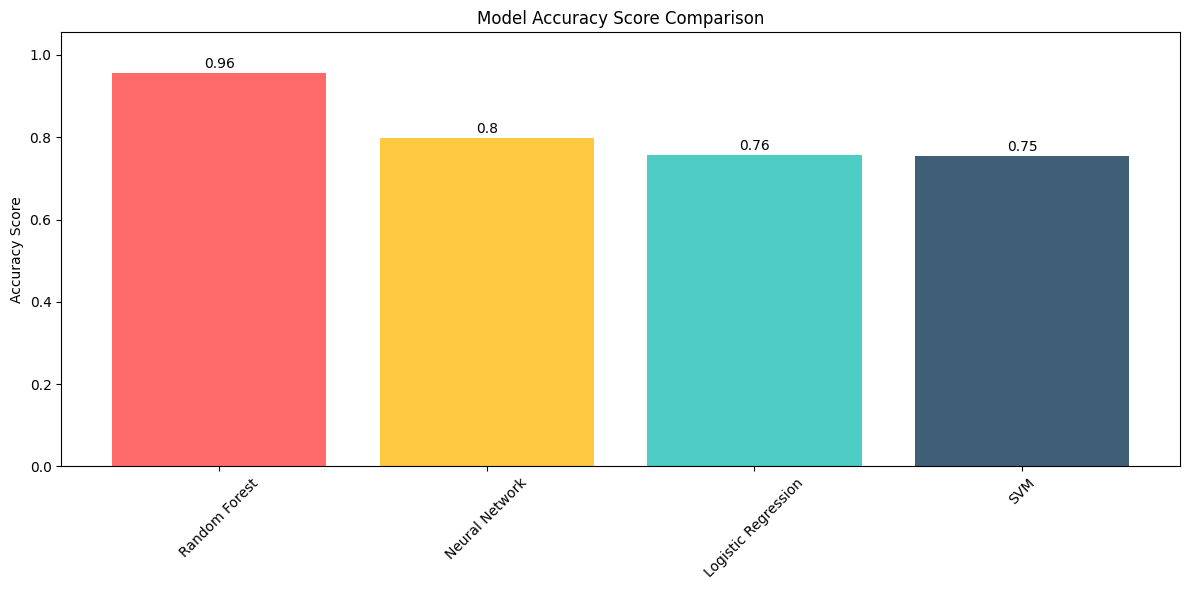

In [15]:
#plot accuracy
metric_to_plot = "Accuracy Score"
model_names = list(performance_metrics[metric_to_plot].keys())
scores = list(performance_metrics[metric_to_plot].values())

#sort models based on score
sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
sorted_models = [model_names[i] for i in sorted_indices]
sorted_scores = [scores[i] for i in sorted_indices]

colors = ["#FF6B6B", "#FFC940", "#4ECDC4", "#3E5F76", "#6D9EA0", "#D4E5E2"]

#plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_models, sorted_scores, color=colors[:len(sorted_models)])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

plt.ylabel(metric_to_plot.replace('_', ' '))
plt.title(f"Model {metric_to_plot.replace('_', ' ')} Comparison")
plt.ylim([0, max(sorted_scores) + 0.1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Binary Classification for Target Variable: Disease vs No Disease
Although we are getting an extremely high random forest accuracy score, the bias towards 'no disease' in the target variable may be creating model bias. First, we will try splitting the target variable into a binary classification between 'disease' and 'no disease'. Currently, the variable 'target' is split into 30 one-hot-encoded columns. In order to perform the binary classification, we will create a new binary target column and exclude the one-hot-encoded columns from this analysis. 

In [16]:
if 'Diagnosis_-' in df.columns:
    # Create a binary target where 'Diagnosis_-' equals 0 (No Disease) and any other Diagnosis equals 1 (Disease)
    df['binary_target'] = 1 - df['Diagnosis_-'].astype(int)

    #Define X and Y 
    X = df.drop(columns=df.filter(like='Diagnosis_').columns.tolist() + ['binary_target'])
    y_binary = df['binary_target']

    if df['binary_target'].isnull().any():
        print("NaN values found in binary_target")

    X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
        X, y_binary, 
        test_size=0.2, 
        stratify=y_binary,
        random_state=42
    )
else:
    raise ValueError("The 'Diagnosis_-' column was not found in the dataframe.")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


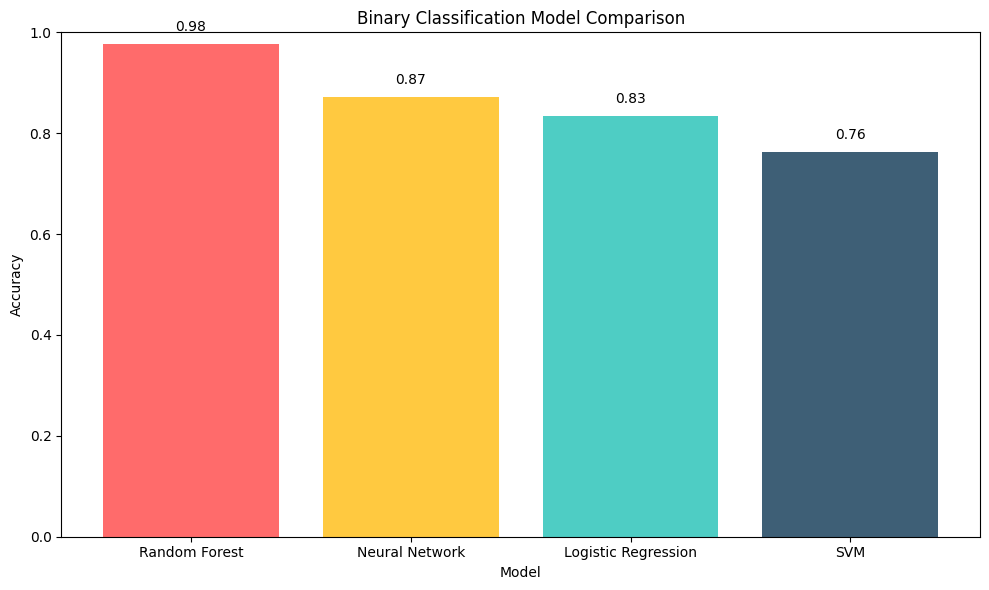

In [17]:
# Define the models
models = {
    "Neural Network": MLPClassifier(max_iter=1000),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to store model accuracies
accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_bin, y_train_bin)
    predictions = model.predict(X_test_bin)
    accuracies[model_name] = accuracy_score(y_test_bin, predictions)

# Sort the models by accuracy
sorted_names = sorted(accuracies, key=accuracies.get, reverse=True)
sorted_accuracies = [accuracies[name] for name in sorted_names]

# Plotting the model comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_names, sorted_accuracies, color=['#FF6B6B', '#FFC940', '#4ECDC4', '#3E5F76'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Binary Classification Model Comparison')
plt.ylim([0, 1])
for i, v in enumerate(sorted_accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for Neural Network:
Accuracy: 0.87
Precision: 0.81
Recall: 0.67
F1 Score: 0.73
ROC AUC: 0.89
Confusion Matrix:
 [[2560  149]
 [ 317  643]]


Results for SVM:
Accuracy: 0.76
Precision: 1.00
Recall: 0.09
F1 Score: 0.16
ROC AUC: 0.82
Confusion Matrix:
 [[2709    0]
 [ 874   86]]


Results for Logistic Regression:
Accuracy: 0.83
Precision: 0.90
Recall: 0.41
F1 Score: 0.57
ROC AUC: 0.80
Confusion Matrix:
 [[2665   44]
 [ 562  398]]


Results for Random Forest:
Accuracy: 0.98
Precision: 0.97
Recall: 0.94
F1 Score: 0.96
ROC AUC: 0.98
Confusion Matrix:
 [[2681   28]
 [  56  904]]




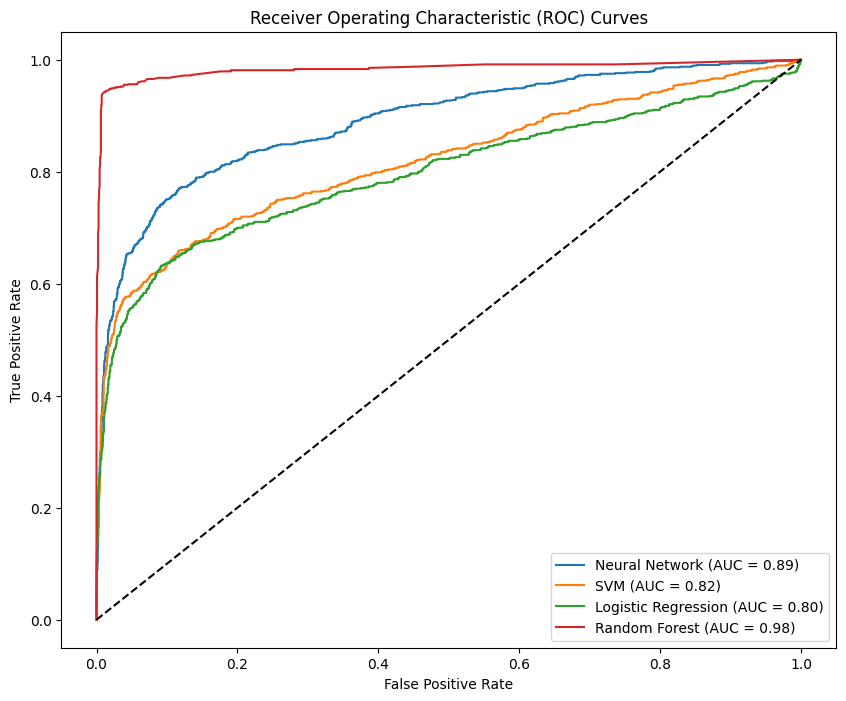

In [18]:
#dictionaries for all metrics
accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}
roc_auc_scores = {}
confusion_matrices = {}

#train
for model_name, model in models.items():
    #fit
    model.fit(X_train_bin, y_train_bin)
    
    #predict
    predictions = model.predict(X_test_bin)
    
    #calculate probabilities for AUC
    if hasattr(model, "predict_proba"):
        probabilities = model.predict_proba(X_test_bin)[:,1]
        roc_auc = roc_auc_score(y_test_bin, probabilities)
    else:
        probabilities = model.decision_function(X_test_bin)
        roc_auc = roc_auc_score(y_test_bin, probabilities)
    
    #calculate metrics
    accuracy = accuracy_score(y_test_bin, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_bin, predictions, average='binary')
    
    #store metrics in dictionaries
    accuracies[model_name] = accuracy
    precisions[model_name] = precision
    recalls[model_name] = recall
    f1_scores[model_name] = f1
    roc_auc_scores[model_name] = roc_auc
    confusion_matrices[model_name] = confusion_matrix(y_test_bin, predictions)

#plot and print
plt.figure(figsize=(10, 8))

#iterate over models
for model_name, model in models.items():
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracies[model_name]:.2f}")
    print(f"Precision: {precisions[model_name]:.2f}")
    print(f"Recall: {recalls[model_name]:.2f}")
    print(f"F1 Score: {f1_scores[model_name]:.2f}")
    print(f"ROC AUC: {roc_auc_scores[model_name]:.2f}")
    print(f"Confusion Matrix:\n {confusion_matrices[model_name]}")
    print("\n")
    
    #ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin, model.predict_proba(X_test_bin)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_scores[model_name]:.2f})')

#no-skill line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

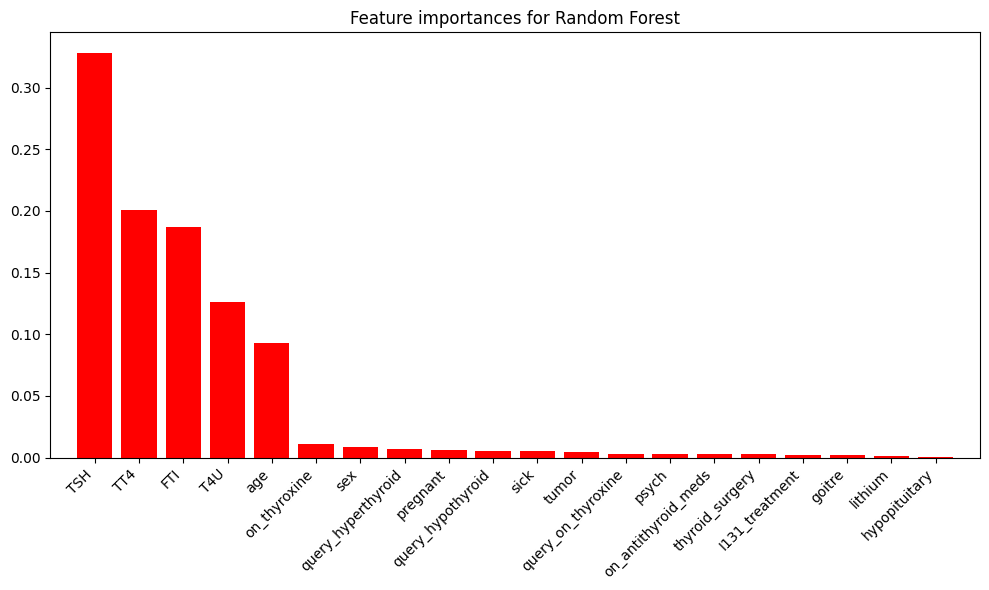

In [20]:
#finding feature importance for models that have built-in
feature_importances = {}

for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        if not hasattr(model, 'is_fitted_') or not model.is_fitted_:
            model.fit(X_train_bin, y_train_bin)
            
        feature_importances[model_name] = model.feature_importances_

#plot feature importance
for model_name, importances in feature_importances.items():
    indices = np.argsort(importances)[::-1]
    
    #map indices back to feature names
    sorted_feature_names = X_train_bin.columns[indices]
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature importances for {model_name}")
    
    plt.bar(range(X_train_bin.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_train_bin.shape[1]), sorted_feature_names, rotation=45, ha='right')
    
    plt.xlim([-1, X_train_bin.shape[1]])
    plt.tight_layout() 
    plt.show()

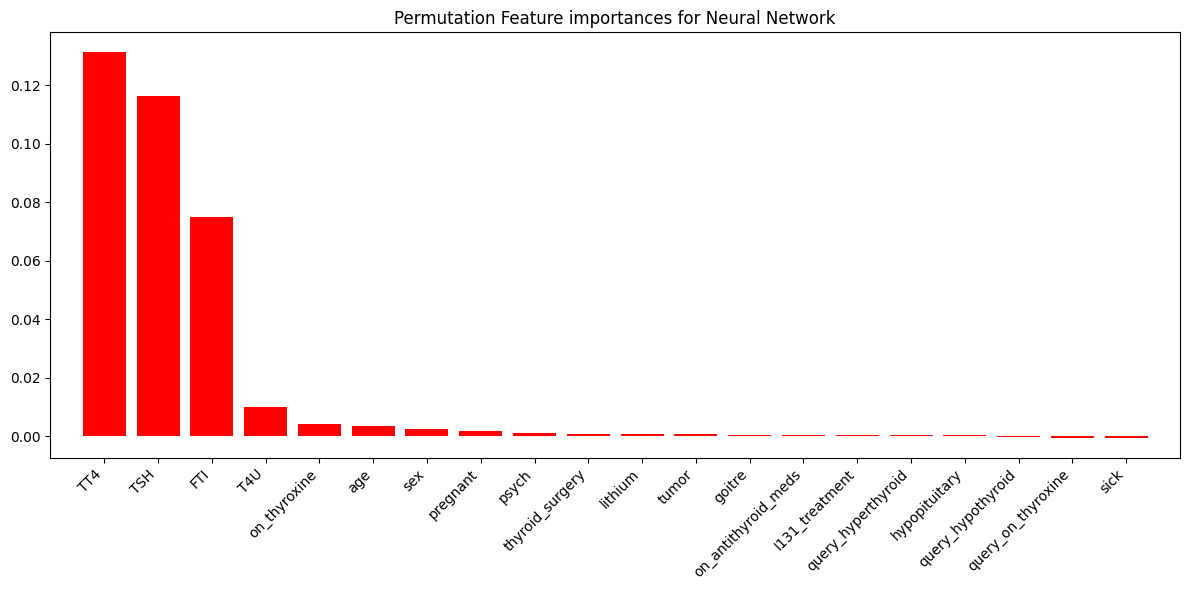

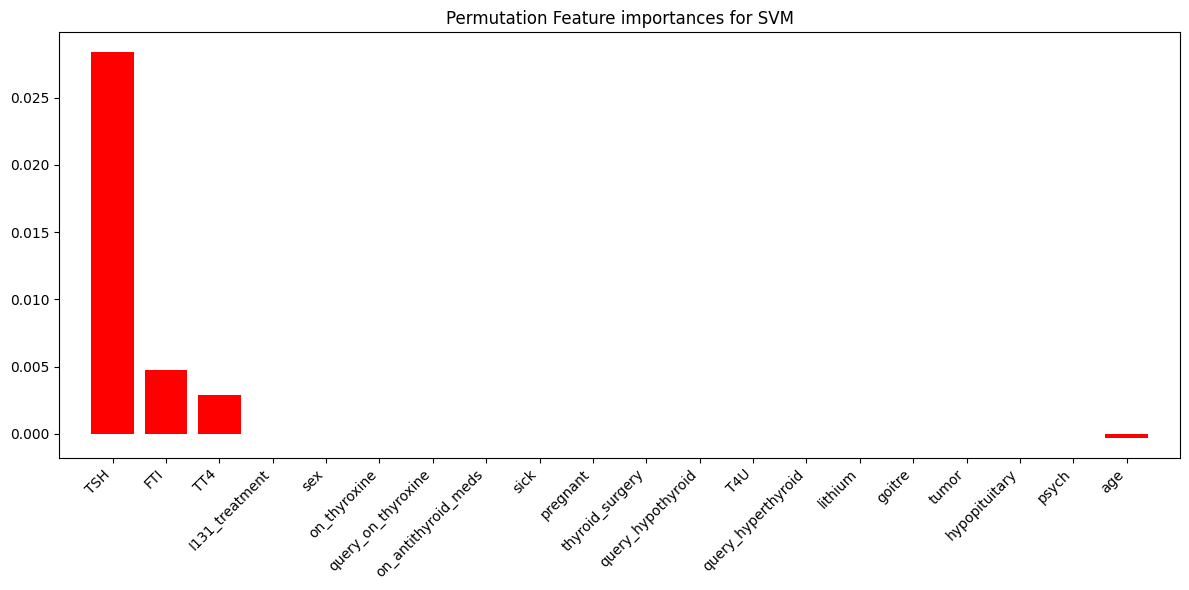

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


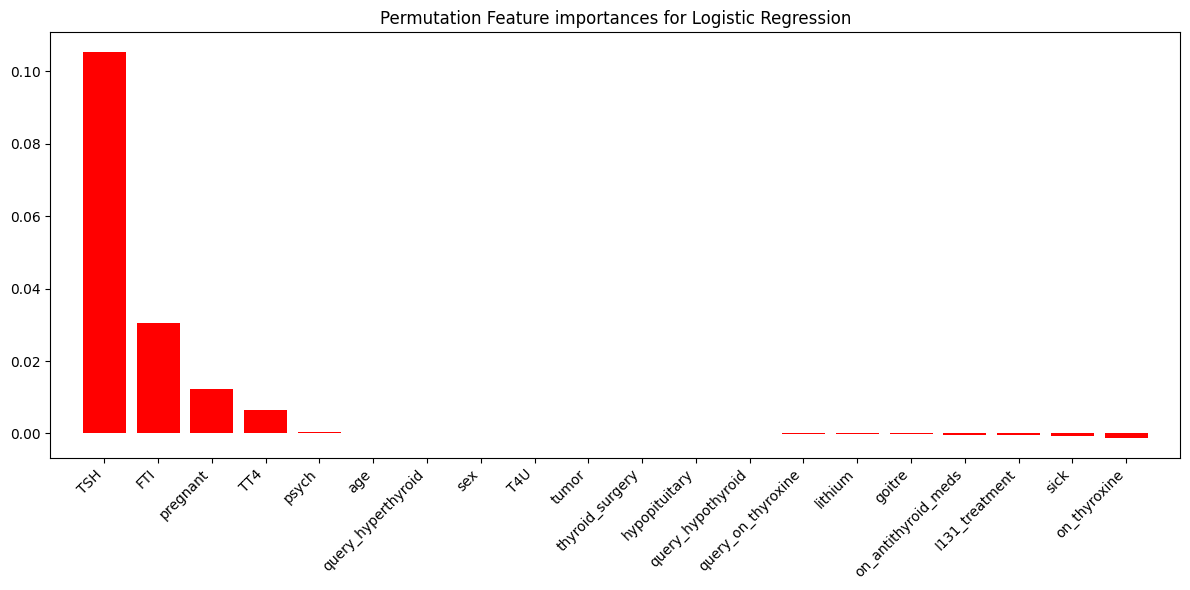

In [22]:
#finding permutation importance for models without feature importance
for model_name, model in models.items():
    if not hasattr(model, 'feature_importances_'):
        if not hasattr(model, 'is_fitted_') or not model.is_fitted_:
            model.fit(X_train_bin, y_train_bin)
        
        result = permutation_importance(model, X_test_bin, y_test_bin, n_repeats=10, random_state=42, n_jobs=-1)
        feature_importances[model_name] = result.importances_mean

        #map indices to names of features
        indices = np.argsort(feature_importances[model_name])[::-1]
        sorted_feature_names = X_train_bin.columns[indices]

        plt.figure(figsize=(12, 6))
        plt.title(f"Permutation Feature importances for {model_name}")
        
        plt.bar(range(X_train_bin.shape[1]), feature_importances[model_name][indices], color="r", align="center")
        plt.xticks(range(X_train_bin.shape[1]), sorted_feature_names, rotation=45, ha='right')
        
        plt.xlim([-1, X_train_bin.shape[1]])
        plt.tight_layout()
        plt.show()

Based on feature importance, there are several possible research questions we could propose for this binary classification of the target variable. 

    -Question: How do levels of hormones like TSH, TT4 and FTI contribute to the ML prediction of thyroid disease?
    -Method: Random Forest classifier to assess feature importance. PDPs to understand the relationship between hormones and the predicted probability of disease. 

    -Question: Does the model predict thyroid disease differently for males and females?
    -Method: Stratify model performance by sex and examine metrics. 

    -Question: Is there a threshold effect for continuous variables (hormone levels), where values above or below a certain point significantly increase or decrease the risk of disease development?
    -Method: Recursive patitioning (decision tree/ensemble tree) to identify potential thresholds.

    -Question: Are there significant interaction effects between features (ie; age & hormone levels) that impact disease prediction?
    -Method: Interaction model (GBM, Neural Network) to analyze effects (consider using SHAP)

## Multi-class Classification for Target Variable: Hyperthyroid vs Hypothyroid vs No Disease
Now that we have confirmed higher accuracies from our binary classifiers, we will further disect the target variable into a 3 way, multi-class classification in order to account for overfitting and assess the accuracy of our models distinction between hyperthyroidism and hypothyroidism.

In [23]:
#define columns 
diagnosis_columns = df.filter(like='Diagnosis_').columns
print(diagnosis_columns)

#double check columns 
if diagnosis_columns.empty:
    raise ValueError("No 'Diagnosis_' columns found in the DataFrame.")

#isolate disease codes
df['disease'] = df[diagnosis_columns].idxmax(axis=1)
df['disease'] = df['disease'].str.replace('Diagnosis_', '')

#map diagnoses
mapping = {
    '-': "Negative",
    'A': 'Hyperthyroid', 'AK': "Hyperthyroid", 'B': "Hyperthyroid", 'C': "Hyperthyroid",
    'C|I': 'Hyperthyroid', 'D': "Hyperthyroid", 'D|R': "Hyperthyroid",
    'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid",
    "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid'
}

#Map diseases to 'Negative', 'Hyperthyroid', or 'Hypothyroid'
df['target'] = df['disease'].map(mapping)

#any diseases not mapped? 
df['target'] = df['target'].fillna('Other')

#verify
print(df['target'].value_counts())

Index(['Diagnosis_-', 'Diagnosis_A', 'Diagnosis_AK', 'Diagnosis_B',
       'Diagnosis_C', 'Diagnosis_D', 'Diagnosis_E', 'Diagnosis_F',
       'Diagnosis_FK', 'Diagnosis_G', 'Diagnosis_GI', 'Diagnosis_GK',
       'Diagnosis_GKJ', 'Diagnosis_H', 'Diagnosis_I', 'Diagnosis_J',
       'Diagnosis_K', 'Diagnosis_KJ', 'Diagnosis_L', 'Diagnosis_LJ',
       'Diagnosis_M', 'Diagnosis_MI', 'Diagnosis_MK', 'Diagnosis_N',
       'Diagnosis_O', 'Diagnosis_OI', 'Diagnosis_P', 'Diagnosis_Q',
       'Diagnosis_R', 'Diagnosis_S'],
      dtype='object')
target
Negative        13542
Other            3002
Hypothyroid      1318
Hyperthyroid      482
Name: count, dtype: int64


*Note to Owners*: There is a dramatic skew in this dataset towards hypothyroidism. We should consider focusing any further research questions on hypothyroidism and its related conditions. 

In [24]:
#Define X & Y 
X_multiclass = df.drop(columns=diagnosis_columns.tolist() + ['disease', 'target'])
y_multiclass = df['target']

#train-test split
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(
    X_multiclass, y_multiclass, test_size=0.2, random_state=42, stratify=y_multiclass
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


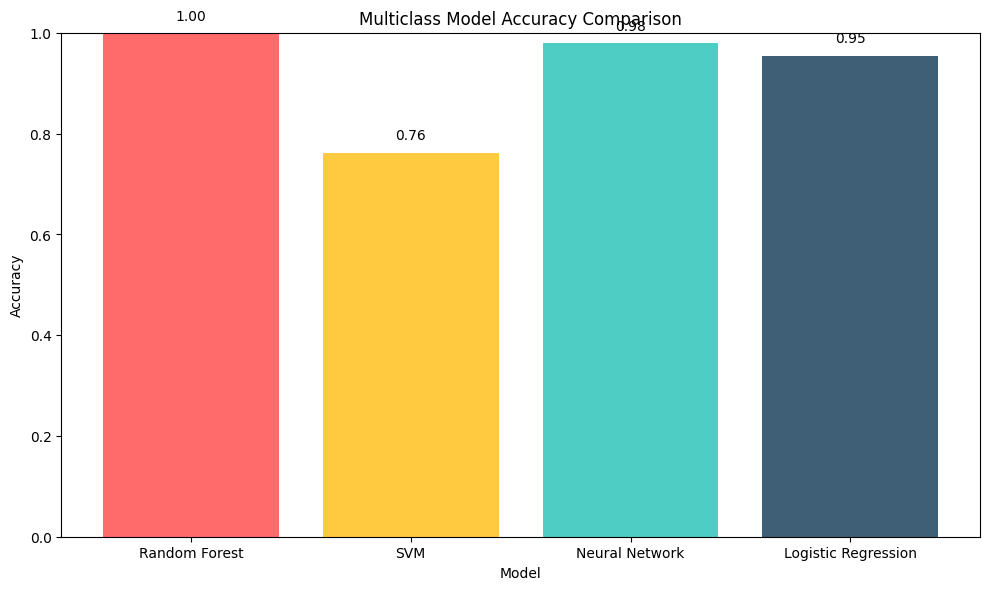

In [25]:
#Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

#dictionary for accuracies
model_accuracies_multiclass = {}

#train each model for multiclass classification
for model_name, model in models.items():
    model.fit(X_train_multiclass, y_train_multiclass)
    
    #predict on the test data
    y_pred_multiclass = model.predict(X_test_multiclass)
    
    #accuracy
    accuracy = accuracy_score(y_test_multiclass, y_pred_multiclass)
    
    model_accuracies_multiclass[model_name] = accuracy

#plot model accuracy comparison 
plt.figure(figsize=(10, 6))
model_names_multiclass = list(model_accuracies_multiclass.keys())
accuracies_multiclass = list(model_accuracies_multiclass.values())
plt.bar(model_names_multiclass, accuracies_multiclass, color=['#FF6B6B', '#FFC940', '#4ECDC4', '#3E5F76'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Multiclass Model Accuracy Comparison')
plt.ylim([0, 1])
for i, v in enumerate(accuracies_multiclass):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [26]:
#unique list of target outcomes
unique_classes = np.unique(y_multiclass)

#dics for all metrics
accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}
roc_auc_scores = {}
confusion_matrices = {}

#train and evaluate each model
for model_name, model in models.items():
    y_test_binarized = label_binarize(y_test_multiclass, classes=unique_classes)

    #train the model on the training data
    model.fit(X_train_multiclass, y_train_multiclass)

    #predict on the test data
    predictions = model.predict(X_test_multiclass)
    
    #calculate probabilities for ROC AUC 
    if hasattr(model, "predict_proba"):
        probabilities = model.predict_proba(X_test_multiclass)
        if len(unique_classes) == 2: 
            probabilities = probabilities[:, 1]
        roc_auc = roc_auc_score(y_test_binarized, probabilities, average='macro', multi_class='ovr')
    else:
        model = OneVsRestClassifier(model)
        model.fit(X_train_multiclass, y_train_multiclass)
        probabilities = model.decision_function(X_test_multiclass)
        roc_auc = roc_auc_score(y_test_binarized, probabilities, average='macro', multi_class='ovr')
    
    #calculate metrics
    accuracy = accuracy_score(y_test_multiclass, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_multiclass, predictions, average='weighted')
    
    #store metrics
    accuracies[model_name] = accuracy
    precisions[model_name] = precision
    recalls[model_name] = recall
    f1_scores[model_name] = f1
    roc_auc_scores[model_name] = roc_auc
    confusion_matrices[model_name] = confusion_matrix(y_test_multiclass, predictions)

#print
plt.figure(figsize=(10, 8))

model_names = []
model_accuracies = []

#iterate over models to print metrics and plot ROC curves
for model_name in models.keys():
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracies[model_name]:.2f}")
    print(f"Precision: {precisions[model_name]:.2f}")
    print(f"Recall: {recalls[model_name]:.2f}")
    print(f"F1 Score: {f1_scores[model_name]:.2f}")
    print(f"ROC AUC (macro, ovr): {roc_auc_scores[model_name]:.2f}")
    print(f"Confusion Matrix:\n {confusion_matrices[model_name]}")
    print("\n")

    #append
    model_names.append(model_name)
    model_accuracies.append(accuracies[model_name])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for Random Forest:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC (macro, ovr): 1.00
Confusion Matrix:
 [[  92    0    0    4]
 [   0  264    0    0]
 [   0    0 2709    0]
 [   0    0    0  600]]


Results for SVM:
Accuracy: 0.76
Precision: 0.64
Recall: 0.76
F1 Score: 0.68
ROC AUC (macro, ovr): 0.93
Confusion Matrix:
 [[  32    0   64    0]
 [   0   58  206    0]
 [   2    0 2707    0]
 [  16    7  577    0]]


Results for Neural Network:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
ROC AUC (macro, ovr): 1.00
Confusion Matrix:
 [[  86    0    0   10]
 [   0  263    0    1]
 [   0    0 2709    0]
 [  49   15    0  536]]


Results for Logistic Regression:
Accuracy: 0.95
Precision: 0.96
Recall: 0.95
F1 Score: 0.95
ROC AUC (macro, ovr): 0.99
Confusion Matrix:
 [[  53    0    0   43]
 [   0  174    0   90]
 [   0    0 2709    0]
 [  18   16    0  566]]




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 1000x800 with 0 Axes>